<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Local-Surrogate-(LIME)" data-toc-modified-id="Local-Surrogate-(LIME)-1">Local Surrogate (LIME)</a></span></li><li><span><a href="#Idea:" data-toc-modified-id="Idea:-2">Idea:</a></span></li><li><span><a href="#Math" data-toc-modified-id="Math-3">Math</a></span></li><li><span><a href="#Pros" data-toc-modified-id="Pros-4">Pros</a></span></li><li><span><a href="#Cons" data-toc-modified-id="Cons-5">Cons</a></span></li><li><span><a href="#Usage" data-toc-modified-id="Usage-6">Usage</a></span></li><li><span><a href="#Demo" data-toc-modified-id="Demo-7">Demo</a></span></li><li><span><a href="#End" data-toc-modified-id="End-8">End</a></span></li></ul></div>

# Local Surrogate (LIME)

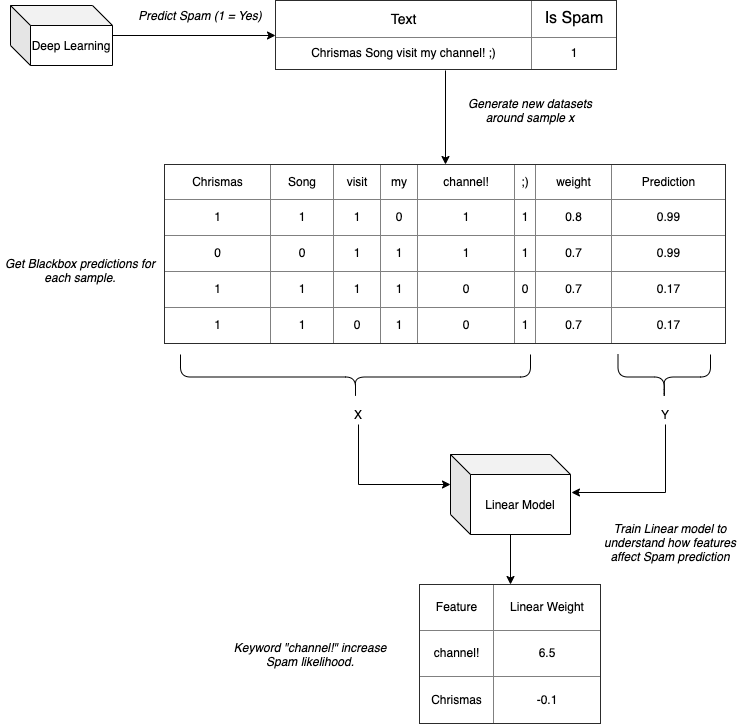

> explain individual predictions of black box model.

# Idea:

- Pick a sample we want to exlain.
- Generate new dataset base on this sample: change/perturb some features. For example: We generate a new dataset with 100 samples. Each sample also has a weight. Weight is the closeness to original sample.
- Get 100 predictions by feeding these samples into model. We now have a new dataset and its labels.
- Next is to train a linear model on this data.
- Linear model is a local approximation of black box model on this sample. Explain Linear model to understand how black box model works on original sample.

How do you get the variations of the data? This depends on the type of data, which can be either text, image or tabular data. 

- For text and images, the solution is to turn single words or super-pixels on or off.
- In the case of tabular data, LIME creates new samples by perturbing each feature individually, drawing from a normal distribution with mean and standard deviation taken from the feature.

# Math

$$
\text{explanation}(x)=\arg\min_{g\in{}G}L(f,g,\pi_x)+\Omega(g)
$$

- $f$: black box model.
- $g$: local approximation model, e.g. Linear Model. $G$ is set of all local approximation models, e.g. all Linear Models.
- $\pi_x$: How large is the generated dataset around sample we want to explain.
- $L$: The loss function of 
- $\Omega(g)$: Complexity of approximation model. Lower is better.
- We want to mimimize the Loss fuction by choosing the Linear model which produce prediction closest to original blackbox model. Among similar Linear model, pick the one that has least complexity.


# Pros

- Work with image, text, and tabular.
- Can change any underlying blackbox model without affect LIME.
- Work for non-interpretable transformation on features, like Embedding or PCA. Because LIME generates new dataset based on original features, before transformation.

# Cons

- How large is the neighbor hoood of generated dataset? In tabular, this is the big big problem. If we generated too large dataset around sample, new dataset is not a good local approximation to explain this sample. Too small dataset is not a reliable explanation.

> use LIME only with great care

- Explanation is un-stable! This is critical issue because we cannot trust the explaination having large instability. 2 generated datasets results can have 2 different explanation.

# Usage

- Image and Text is okay.
- Tabular: Use with care. Do not use it is better!

# Demo

# End